In [2]:
import seaborn as sea
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics as st

In [3]:
data = pd.read_csv('/content/adult_dataset.csv')

In [4]:
data.sample(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
28540,47.0,Private,176239,Some-college,10,Widowed,Prof-specialty,Unmarried,White,Female,0,0,40.0,United-States,<=50K
23125,31.0,Private,339482,1st-4th,2,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40.0,Mexico,<=50K
19318,24.0,?,175069,Bachelors,13,Never-married,?,Not-in-family,White,Male,0,0,50.0,United-States,<=50K
9952,30.0,State-gov,137613,Masters,14,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,17.0,Taiwan,<=50K
8959,NaN,Self-emp-not-inc,123116,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40.0,United-States,<=50K
20967,20.0,Private,224640,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,40.0,United-States,<=50K
13686,50.0,Private,130780,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States,<=50K
19687,NaN,Private,180607,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Female,0,0,NaN,United-States,<=50K
3255,47.0,?,111563,Assoc-voc,11,Divorced,NaN,Not-in-family,White,Male,0,0,40.0,United-States,<=50K
19417,44.0,Private,151985,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,24.0,United-States,>50K


In [5]:
# Checking for Duplicates
data.duplicated().sum()
# Here we have 16 duplicates

np.int64(16)

In [6]:
# Removing duplicates
data = data.drop_duplicates()
data.duplicated().sum()

np.int64(0)

In [7]:
# Checking for Missing Values
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48826 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             46384 non-null  float64
 1   workclass       45464 non-null  object 
 2   fnlwgt          48826 non-null  int64  
 3   education       48826 non-null  object 
 4   education-num   48826 non-null  int64  
 5   marital-status  48826 non-null  object 
 6   occupation      45469 non-null  object 
 7   relationship    48826 non-null  object 
 8   race            48826 non-null  object 
 9   sex             48826 non-null  object 
 10  capital-gain    48826 non-null  int64  
 11  capital-loss    48826 non-null  int64  
 12  hours-per-week  46384 non-null  float64
 13  native-country  46121 non-null  object 
 14  income          48826 non-null  object 
dtypes: float64(2), int64(4), object(9)
memory usage: 6.0+ MB


In [8]:
data.isnull().mean()*100
# We have some missing Values

,0
age,5.001434
workclass,6.885676
fnlwgt,0.000000
education,0.000000
education-num,0.000000
marital-status,0.000000
occupation,6.875435
relationship,0.000000
race,0.000000
sex,0.000000


In [9]:
# Handling missing values with Median and Mode
data['age'].fillna(st.median(data['age']),inplace=True)
data['workclass'].fillna(st.mode(data['workclass']),inplace=True)
data['occupation'].fillna(st.mode(data['occupation']),inplace=True)
data['hours-per-week'].fillna(st.median(data['hours-per-week']),inplace=True)
data['native-country'].fillna(st.mode(data['native-country']),inplace=True)

/tmp/ipython-input-1049252258.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].fillna(st.median(data['age']),inplace=True)
/tmp/ipython-input-1049252258.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

In [10]:
data.isnull().mean()*100

,0
age,0.0
workclass,0.0
fnlwgt,0.0
education,0.0
education-num,0.0
marital-status,0.0
occupation,0.0
relationship,0.0
race,0.0
sex,0.0


In [11]:
data['occupation'] = data['occupation'].replace('?', np.nan)
data['occupation'].fillna(st.mode(data['occupation']), inplace=True)

/tmp/ipython-input-1040415693.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['occupation'].fillna(st.mode(data['occupation']), inplace=True)


In [12]:
data['workclass'] = data['workclass'].replace('?', np.nan)
data['workclass'].fillna(st.mode(data['workclass']), inplace=True)

/tmp/ipython-input-2869035381.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['workclass'].fillna(st.mode(data['workclass']), inplace=True)


In [13]:
numerical = data.select_dtypes('number')

In [14]:
cat = data.select_dtypes('object')

In [15]:
# Finding outliers in numericals
numerical.skew()

,0
age,0.869362
fnlwgt,1.439357
education-num,-0.315970
capital-gain,11.892692
capital-loss,4.568956
hours-per-week,0.812937


In [16]:
round(numerical.describe())

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48826.0,48826.0,48826.0,48826.0,48826.0,48826.0
mean,39.0,189660.0,10.0,1079.0,88.0,40.0
std,14.0,105602.0,3.0,7453.0,403.0,12.0
min,17.0,12285.0,1.0,0.0,0.0,1.0
25%,28.0,117555.0,9.0,0.0,0.0,40.0
50%,38.0,178138.0,10.0,0.0,0.0,40.0
75%,49.0,237617.0,12.0,0.0,0.0,45.0
max,255.0,1490400.0,16.0,99999.0,4356.0,250.0


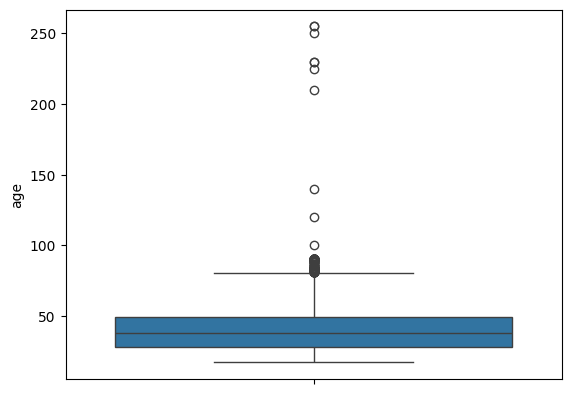

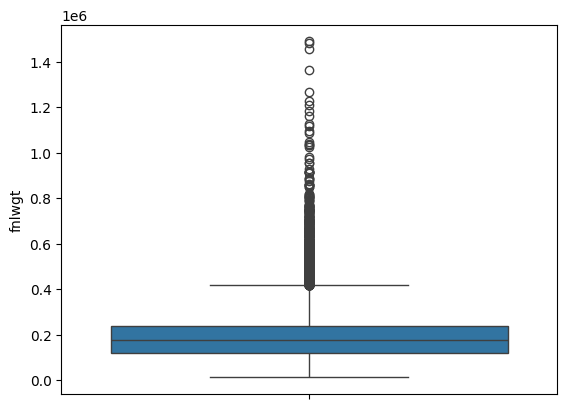

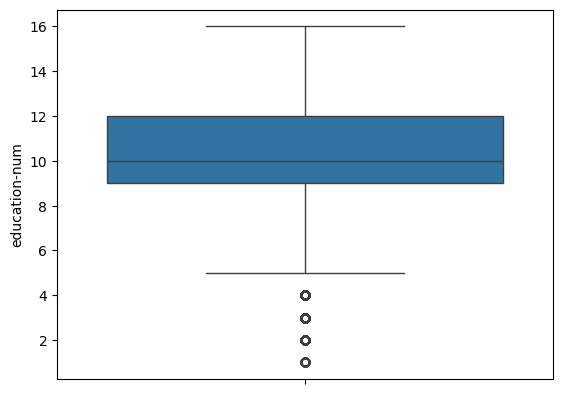

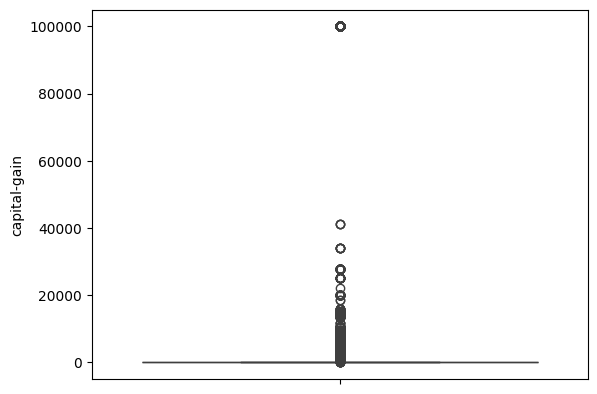

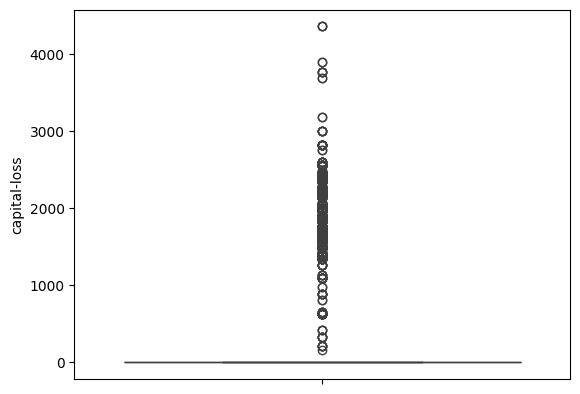

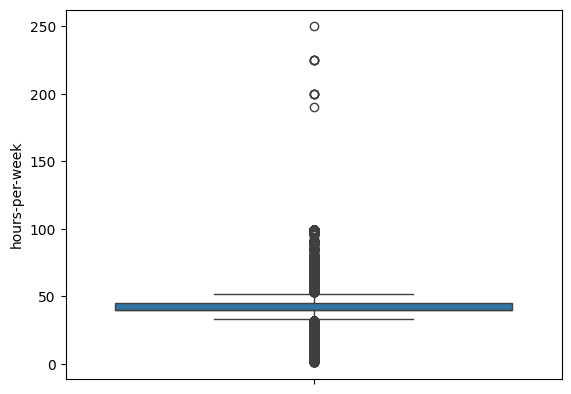

In [17]:
for i in numerical:
    sea.boxplot(numerical[i])
    plt.show()

In [18]:
Q1 = numerical['age'].quantile(0.25)
Q3 = numerical['age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

numerical['age']= numerical['age'].clip(lower_bound,upper_bound)

In [19]:
Q1 = numerical['capital-gain'].quantile(0.25)
Q3 = numerical['capital-gain'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

numerical['capital-gain']= numerical['capital-gain'].clip(lower_bound,upper_bound)

In [20]:
Q1 = numerical['capital-loss'].quantile(0.25)
Q3 = numerical['capital-loss'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

numerical['capital-loss']= numerical['capital-loss'].clip(lower_bound,upper_bound)

In [21]:
Q1 = numerical['education-num'].quantile(0.25)
Q3 = numerical['education-num'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

numerical['education-num']= numerical['education-num'].clip(lower_bound,upper_bound)

In [22]:
Q1 = numerical['fnlwgt'].quantile(0.25)
Q3 = numerical['fnlwgt'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

numerical['fnlwgt']= numerical['fnlwgt'].clip(lower_bound,upper_bound)

In [23]:
Q1 = numerical['hours-per-week'].quantile(0.25)
Q3 = numerical['hours-per-week'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

numerical['hours-per-week']= numerical['hours-per-week'].clip(lower_bound,upper_bound)

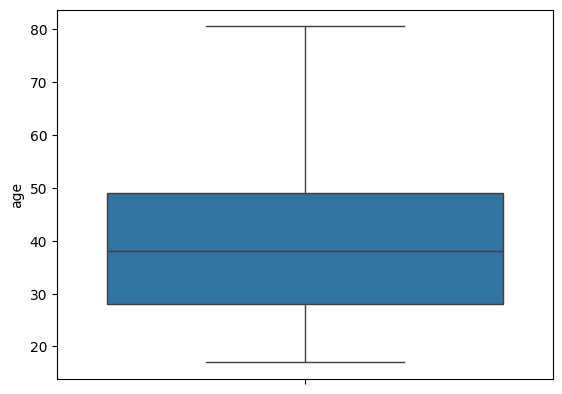

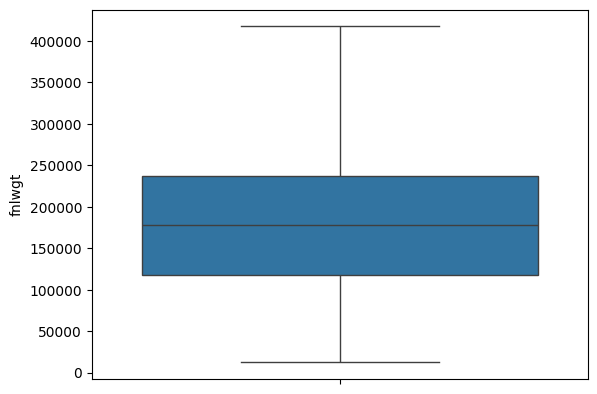

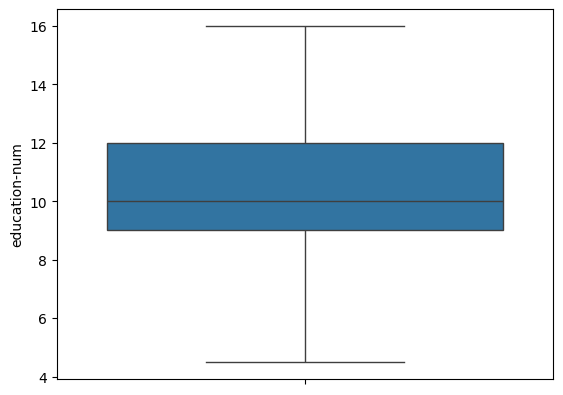

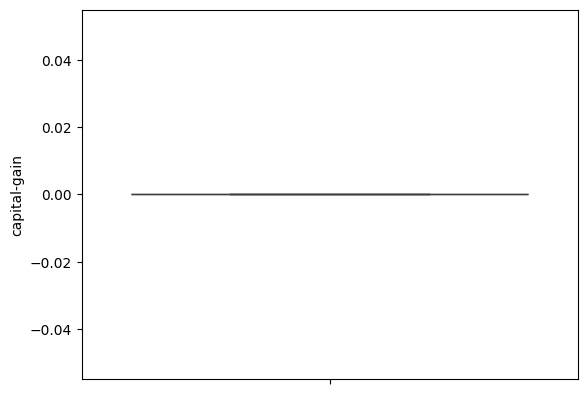

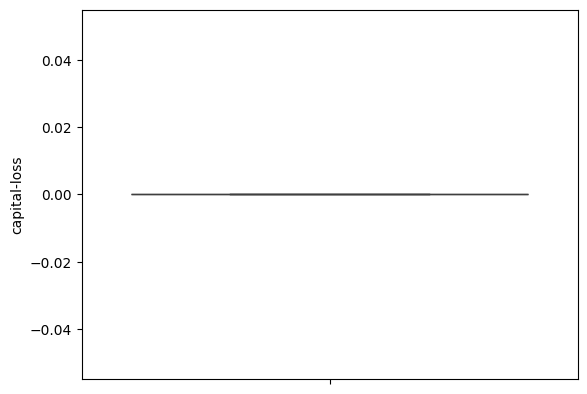

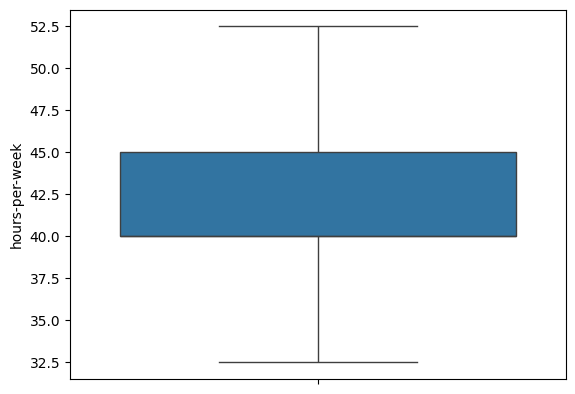

In [24]:
for i in numerical:
    sea.boxplot(numerical[i])
    plt.show()

In [25]:
numerical.skew()

,0
age,0.430249
fnlwgt,0.555022
education-num,-0.035350
capital-gain,0.000000
capital-loss,0.000000
hours-per-week,0.480415


In [26]:
feature = pd.concat([numerical,cat],axis =1)
feature = feature.drop(['native-country','income','relationship'], axis=1)

In [27]:
feature = pd.DataFrame(feature)
feature.head(3)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,race,sex
0,39.0,77516,13.0,0,0,40.0,State-gov,Bachelors,Never-married,Adm-clerical,White,Male
1,50.0,83311,13.0,0,0,32.5,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,White,Male
2,38.0,215646,9.0,0,0,40.0,Private,HS-grad,Divorced,Handlers-cleaners,White,Male


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Bachelors'),
  Text(1, 0, 'HS-grad'),
  Text(2, 0, '11th'),
  Text(3, 0, 'Masters'),
  Text(4, 0, '9th'),
  Text(5, 0, 'Some-college'),
  Text(6, 0, 'Assoc-acdm'),
  Text(7, 0, 'Assoc-voc'),
  Text(8, 0, '7th-8th'),
  Text(9, 0, 'Doctorate'),
  Text(10, 0, 'Prof-school'),
  Text(11, 0, '5th-6th'),
  Text(12, 0, '10th'),
  Text(13, 0, '1st-4th'),
  Text(14, 0, 'Preschool'),
  Text(15, 0, '12th')])

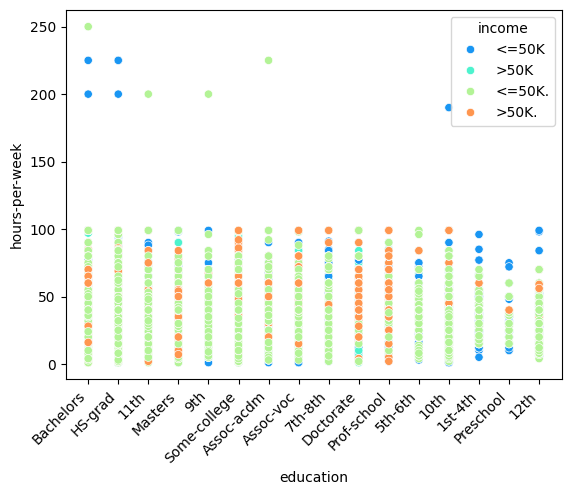

In [28]:
sea.scatterplot(x="education", y="hours-per-week",data=data,hue="income",palette='rainbow')
plt.xticks(rotation=45, ha='right')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Bachelors'),
  Text(1, 0, 'HS-grad'),
  Text(2, 0, '11th'),
  Text(3, 0, 'Masters'),
  Text(4, 0, '9th'),
  Text(5, 0, 'Some-college'),
  Text(6, 0, 'Assoc-acdm'),
  Text(7, 0, 'Assoc-voc'),
  Text(8, 0, '7th-8th'),
  Text(9, 0, 'Doctorate'),
  Text(10, 0, 'Prof-school'),
  Text(11, 0, '5th-6th'),
  Text(12, 0, '10th'),
  Text(13, 0, '1st-4th'),
  Text(14, 0, 'Preschool'),
  Text(15, 0, '12th')])

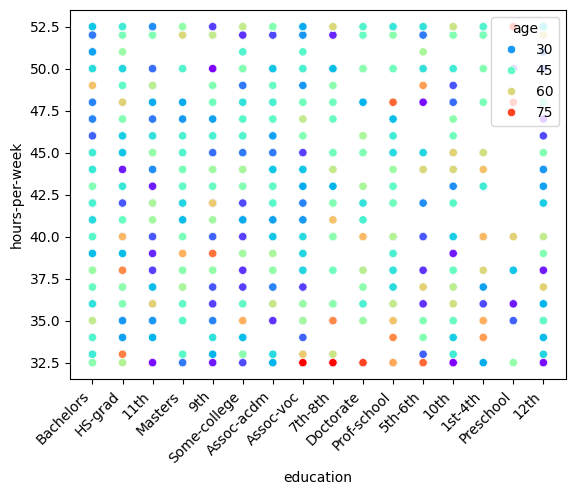

In [29]:
sea.scatterplot(x="education", y="hours-per-week",data=feature,hue="age",palette='rainbow')
plt.xticks(rotation=45, ha='right')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Adm-clerical'),
  Text(1, 0, 'Exec-managerial'),
  Text(2, 0, 'Handlers-cleaners'),
  Text(3, 0, 'Prof-specialty'),
  Text(4, 0, 'Other-service'),
  Text(5, 0, 'Sales'),
  Text(6, 0, 'Craft-repair'),
  Text(7, 0, 'Transport-moving'),
  Text(8, 0, 'Farming-fishing'),
  Text(9, 0, 'Machine-op-inspct'),
  Text(10, 0, 'Tech-support'),
  Text(11, 0, 'Protective-serv'),
  Text(12, 0, 'Armed-Forces'),
  Text(13, 0, 'Priv-house-serv')])

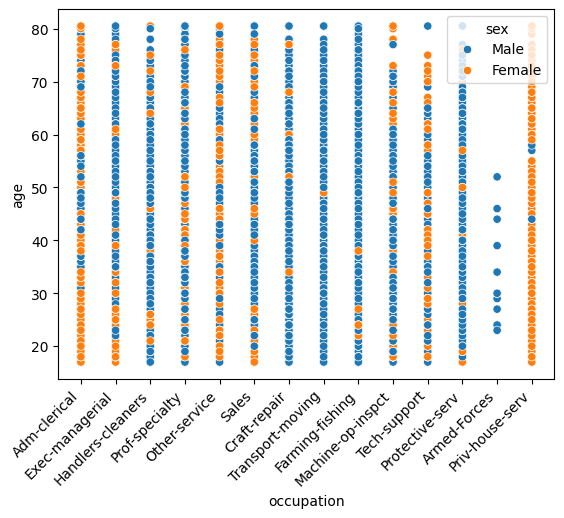

In [30]:
sea.scatterplot(y="age",x="occupation",data=feature,hue ="sex")
plt.xticks(rotation=45, ha='right')

In [31]:
feature.select_dtypes('object')

,workclass,education,marital-status,occupation,race,sex
0,State-gov,Bachelors,Never-married,Adm-clerical,White,Male
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,White,Male
2,Private,HS-grad,Divorced,Handlers-cleaners,White,Male
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Black,Male
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Black,Female
...,...,...,...,...,...,...
48837,Private,Bachelors,Divorced,Prof-specialty,White,Female
48838,Private,HS-grad,Widowed,Prof-specialty,Black,Male
48839,Private,Bachelors,Married-civ-spouse,Prof-specialty,White,Male
48840,Private,Bachelors,Divorced,Adm-clerical,Asian-Pac-Islander,Male


In [32]:
feature['workclass'].value_counts()

,count
workclass,
Private,37330
Self-emp-not-inc,3649
Local-gov,2973
State-gov,1877
Self-emp-inc,1624
Federal-gov,1346
Without-pay,18
Never-worked,9


In [33]:
feature['race'].value_counts()

,count
race,
White,41747
Black,4685
Asian-Pac-Islander,1518
Amer-Indian-Eskimo,470
Other,406


In [34]:
feature['marital-status'].value_counts()

,count
marital-status,
Married-civ-spouse,22377
Never-married,16105
Divorced,6631
Separated,1530
Widowed,1518
Married-spouse-absent,628
Married-AF-spouse,37


In [35]:
feature['education'].value_counts()

,count
education,
HS-grad,15780
Some-college,10874
Bachelors,8021
Masters,2657
Assoc-voc,2060
11th,1812
Assoc-acdm,1601
10th,1389
7th-8th,955


In [36]:
feature['occupation'].value_counts()

,count
occupation,
Prof-specialty,10966
Craft-repair,5790
Exec-managerial,5770
Adm-clerical,5328
Sales,5231
Other-service,4654
Machine-op-inspct,2872
Transport-moving,2238
Handlers-cleaners,1976


In [37]:
feature

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,race,sex
0,39.0,77516,13.0,0,0,40.0,State-gov,Bachelors,Never-married,Adm-clerical,White,Male
1,50.0,83311,13.0,0,0,32.5,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,White,Male
2,38.0,215646,9.0,0,0,40.0,Private,HS-grad,Divorced,Handlers-cleaners,White,Male
3,53.0,234721,7.0,0,0,40.0,Private,11th,Married-civ-spouse,Handlers-cleaners,Black,Male
4,28.0,338409,13.0,0,0,40.0,Private,Bachelors,Married-civ-spouse,Prof-specialty,Black,Female
...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39.0,215419,13.0,0,0,36.0,Private,Bachelors,Divorced,Prof-specialty,White,Female
48838,64.0,321403,9.0,0,0,40.0,Private,HS-grad,Widowed,Prof-specialty,Black,Male
48839,38.0,374983,13.0,0,0,50.0,Private,Bachelors,Married-civ-spouse,Prof-specialty,White,Male
48840,44.0,83891,13.0,0,0,40.0,Private,Bachelors,Divorced,Adm-clerical,Asian-Pac-Islander,Male


In [38]:
feature.shape

(48826, 12)

In [39]:
num_cols = feature.select_dtypes(include=['float64', 'int64']).columns #scale
cat_cols = feature.select_dtypes(include=['object']).columns #encode
cat_cols

Index(['workclass', 'education', 'marital-status', 'occupation', 'race',
       'sex'],
      dtype='object')

In [40]:
X_cat = feature.select_dtypes(include=['object']).columns

In [41]:
# Combine with numerical columns
feature_final = pd.concat([feature[num_cols], feature[cat_cols]], axis=1)

feature_final.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,race,sex
0,39.0,77516,13.0,0,0,40.0,State-gov,Bachelors,Never-married,Adm-clerical,White,Male
1,50.0,83311,13.0,0,0,32.5,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,White,Male
2,38.0,215646,9.0,0,0,40.0,Private,HS-grad,Divorced,Handlers-cleaners,White,Male
3,53.0,234721,7.0,0,0,40.0,Private,11th,Married-civ-spouse,Handlers-cleaners,Black,Male
4,28.0,338409,13.0,0,0,40.0,Private,Bachelors,Married-civ-spouse,Prof-specialty,Black,Female


In [42]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

scaler = StandardScaler()

feature_final[num_cols] = scaler.fit_transform(feature[num_cols])

In [43]:
feature_final

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,race,sex
0,-0.011710,-1.146152,1.171344,0.0,0.0,-0.187370,State-gov,Bachelors,Never-married,Adm-clerical,White,Male
1,0.801519,-1.085355,1.171344,0.0,0.0,-1.430414,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,White,Male
2,-0.085640,0.303009,-0.456772,0.0,0.0,-0.187370,Private,HS-grad,Divorced,Handlers-cleaners,White,Male
3,1.023309,0.503130,-1.270830,0.0,0.0,-0.187370,Private,11th,Married-civ-spouse,Handlers-cleaners,Black,Male
4,-0.824938,1.590950,1.171344,0.0,0.0,-0.187370,Private,Bachelors,Married-civ-spouse,Prof-specialty,Black,Female
...,...,...,...,...,...,...,...,...,...,...,...,...
48837,-0.011710,0.300627,1.171344,0.0,0.0,-0.850327,Private,Bachelors,Divorced,Prof-specialty,White,Female
48838,1.836537,1.412535,-0.456772,0.0,0.0,-0.187370,Private,HS-grad,Widowed,Prof-specialty,Black,Male
48839,-0.085640,1.974658,1.171344,0.0,0.0,1.470021,Private,Bachelors,Married-civ-spouse,Prof-specialty,White,Male
48840,0.357940,-1.079270,1.171344,0.0,0.0,-0.187370,Private,Bachelors,Divorced,Adm-clerical,Asian-Pac-Islander,Male


In [44]:
from sklearn.preprocessing import OneHotEncoder
feature_final = pd.get_dummies(feature_final,columns=['sex'],dtype=int,drop_first=True)
feature_final = pd.get_dummies(feature_final,columns=['marital-status'],dtype=int,drop_first=True)
feature_final = pd.get_dummies(feature_final,columns=['race'],dtype=int,drop_first=True)
feature_final = pd.get_dummies(feature_final,columns=['workclass'],dtype=int,drop_first=True)
feature_final
#ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)  # sparse=False forces dense output
#X_cat = ohe.fit_transform(feature[cat_cols])
#Here we are creating a table that' swhy to get all column name we have given get_feature_names_out(cat_column)
#X_cat = pd.DataFrame(X_cat, columns=ohe.get_feature_names_out(cat_cols), index=feature.index)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,education,occupation,sex_Male,marital-status_Married-AF-spouse,...,race_Black,race_Other,race_White,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay
0,-0.011710,-1.146152,1.171344,0.0,0.0,-0.187370,Bachelors,Adm-clerical,1,0,...,0,0,1,0,0,0,0,0,1,0
1,0.801519,-1.085355,1.171344,0.0,0.0,-1.430414,Bachelors,Exec-managerial,1,0,...,0,0,1,0,0,0,0,1,0,0
2,-0.085640,0.303009,-0.456772,0.0,0.0,-0.187370,HS-grad,Handlers-cleaners,1,0,...,0,0,1,0,0,1,0,0,0,0
3,1.023309,0.503130,-1.270830,0.0,0.0,-0.187370,11th,Handlers-cleaners,1,0,...,1,0,0,0,0,1,0,0,0,0
4,-0.824938,1.590950,1.171344,0.0,0.0,-0.187370,Bachelors,Prof-specialty,0,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,-0.011710,0.300627,1.171344,0.0,0.0,-0.850327,Bachelors,Prof-specialty,0,0,...,0,0,1,0,0,1,0,0,0,0
48838,1.836537,1.412535,-0.456772,0.0,0.0,-0.187370,HS-grad,Prof-specialty,1,0,...,1,0,0,0,0,1,0,0,0,0
48839,-0.085640,1.974658,1.171344,0.0,0.0,1.470021,Bachelors,Prof-specialty,1,0,...,0,0,1,0,0,1,0,0,0,0
48840,0.357940,-1.079270,1.171344,0.0,0.0,-0.187370,Bachelors,Adm-clerical,1,0,...,0,0,0,0,0,1,0,0,0,0


In [45]:
# target encoding to 'Fuel Type' and 'Owner' since these columns have more cardinality

Occ_target_mean = feature_final.groupby('occupation')['sex_Male'].mean() #.333333
# Map City to mean value
feature_final['occupation'] = feature_final['occupation'].map(Occ_target_mean)


edu_target_mean = feature_final.groupby('education')['sex_Male'].mean() #.333333
# Map City to mean value
feature_final['education'] = feature_final['education'].map(edu_target_mean)

In [46]:
feature_final

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,education,occupation,sex_Male,marital-status_Married-AF-spouse,...,race_Black,race_Other,race_White,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay
0,-0.011710,-1.146152,1.171344,0.0,0.0,-0.187370,0.691435,0.330143,1,0,...,0,0,1,0,0,0,0,0,1,0
1,0.801519,-1.085355,1.171344,0.0,0.0,-1.430414,0.691435,0.711958,1,0,...,0,0,1,0,0,0,0,1,0,0
2,-0.085640,0.303009,-0.456772,0.0,0.0,-0.187370,0.677123,0.878543,1,0,...,0,0,1,0,0,1,0,0,0,0
3,1.023309,0.503130,-1.270830,0.0,0.0,-0.187370,0.641280,0.878543,1,0,...,1,0,0,0,0,1,0,0,0,0
4,-0.824938,1.590950,1.171344,0.0,0.0,-0.187370,0.691435,0.621466,0,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,-0.011710,0.300627,1.171344,0.0,0.0,-0.850327,0.691435,0.621466,0,0,...,0,0,1,0,0,1,0,0,0,0
48838,1.836537,1.412535,-0.456772,0.0,0.0,-0.187370,0.677123,0.621466,1,0,...,1,0,0,0,0,1,0,0,0,0
48839,-0.085640,1.974658,1.171344,0.0,0.0,1.470021,0.691435,0.621466,1,0,...,0,0,1,0,0,1,0,0,0,0
48840,0.357940,-1.079270,1.171344,0.0,0.0,-0.187370,0.691435,0.330143,1,0,...,0,0,0,0,0,1,0,0,0,0


# K-Means

In [47]:
from sklearn.cluster import KMeans

In [48]:
inertia =[]
k_values = range(1,11)
for k in k_values:
  kmeans=KMeans(n_clusters=k)
  kmeans.fit(feature_final)
  inertia.append(kmeans.inertia_)
inertia

[265085.9811457985,
 222060.2970482964,
 192852.0684015733,
 173682.04352902653,
 158553.0682064455,
 150647.03339710372,
 143702.89174868292,
 138616.54392395602,
 134601.29929217076,
 131446.4166401457]

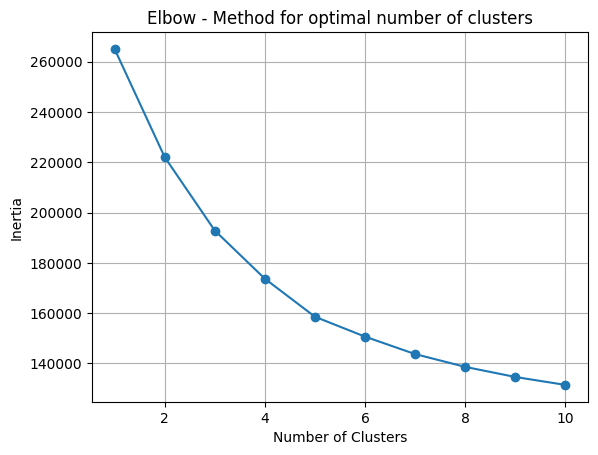

In [49]:
import matplotlib.pyplot as plt
plt.plot(k_values,inertia,marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title('Elbow - Method for optimal number of clusters')
plt.grid(True)
plt.show()

In [50]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5,init='k-means++',n_init=40,max_iter=300)
feature['Cluster'] = kmeans.fit_predict(feature_final)
feature

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,race,sex,Cluster
0,39.0,77516,13.0,0,0,40.0,State-gov,Bachelors,Never-married,Adm-clerical,White,Male,1
1,50.0,83311,13.0,0,0,32.5,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,White,Male,1
2,38.0,215646,9.0,0,0,40.0,Private,HS-grad,Divorced,Handlers-cleaners,White,Male,2
3,53.0,234721,7.0,0,0,40.0,Private,11th,Married-civ-spouse,Handlers-cleaners,Black,Male,2
4,28.0,338409,13.0,0,0,40.0,Private,Bachelors,Married-civ-spouse,Prof-specialty,Black,Female,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39.0,215419,13.0,0,0,36.0,Private,Bachelors,Divorced,Prof-specialty,White,Female,1
48838,64.0,321403,9.0,0,0,40.0,Private,HS-grad,Widowed,Prof-specialty,Black,Male,2
48839,38.0,374983,13.0,0,0,50.0,Private,Bachelors,Married-civ-spouse,Prof-specialty,White,Male,3
48840,44.0,83891,13.0,0,0,40.0,Private,Bachelors,Divorced,Adm-clerical,Asian-Pac-Islander,Male,1


In [51]:
#Evaluate Clustering

# Silhouette Score: Measure how well the clusters are separated.

from sklearn.metrics import silhouette_score
labels = kmeans.labels_
silhouette_avg = silhouette_score(feature_final, labels)

print(silhouette_avg) #0.631640138719835

0.16570383224373408


In [52]:
feature

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,race,sex,Cluster
0,39.0,77516,13.0,0,0,40.0,State-gov,Bachelors,Never-married,Adm-clerical,White,Male,1
1,50.0,83311,13.0,0,0,32.5,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,White,Male,1
2,38.0,215646,9.0,0,0,40.0,Private,HS-grad,Divorced,Handlers-cleaners,White,Male,2
3,53.0,234721,7.0,0,0,40.0,Private,11th,Married-civ-spouse,Handlers-cleaners,Black,Male,2
4,28.0,338409,13.0,0,0,40.0,Private,Bachelors,Married-civ-spouse,Prof-specialty,Black,Female,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39.0,215419,13.0,0,0,36.0,Private,Bachelors,Divorced,Prof-specialty,White,Female,1
48838,64.0,321403,9.0,0,0,40.0,Private,HS-grad,Widowed,Prof-specialty,Black,Male,2
48839,38.0,374983,13.0,0,0,50.0,Private,Bachelors,Married-civ-spouse,Prof-specialty,White,Male,3
48840,44.0,83891,13.0,0,0,40.0,Private,Bachelors,Divorced,Adm-clerical,Asian-Pac-Islander,Male,1


In [53]:
cluster_summary = feature.groupby("Cluster").agg({
    "age": ["mean"],
    "fnlwgt": ["mean"],
    "education-num": ["mean"],
    "hours-per-week": ["mean"],
    "education": ["count"],
    "occupation": ["count"],
    "workclass": "count"
})

cluster_summary


,age,fnlwgt,education-num,hours-per-week,education,occupation,workclass
,mean,mean,mean,mean,count,count,count
Cluster,,,,,,,
0,40.680965,167630.542947,11.019560,50.814421,9535,9535,9535
1,44.202006,161940.076893,13.263042,39.419806,7725,7725,7725
2,52.333628,155659.395077,8.416017,38.802063,11294,11294,11294
3,34.460110,342698.147989,9.587044,40.057716,7433,7433,7433
4,26.123218,152995.054443,9.376704,37.637316,12839,12839,12839


<Axes: xlabel='age', ylabel='hours-per-week'>

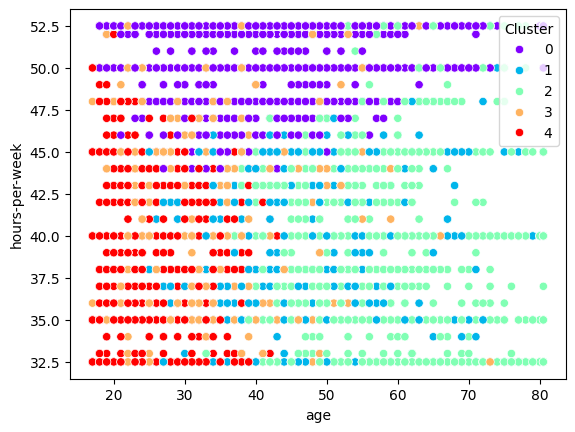

In [54]:
import seaborn as sns
sns.scatterplot(x="age",y="hours-per-week",hue="Cluster",data=feature,palette="rainbow")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Bachelors'),
  Text(1, 0, 'HS-grad'),
  Text(2, 0, '11th'),
  Text(3, 0, 'Masters'),
  Text(4, 0, '9th'),
  Text(5, 0, 'Some-college'),
  Text(6, 0, 'Assoc-acdm'),
  Text(7, 0, 'Assoc-voc'),
  Text(8, 0, '7th-8th'),
  Text(9, 0, 'Doctorate'),
  Text(10, 0, 'Prof-school'),
  Text(11, 0, '5th-6th'),
  Text(12, 0, '10th'),
  Text(13, 0, '1st-4th'),
  Text(14, 0, 'Preschool'),
  Text(15, 0, '12th')])

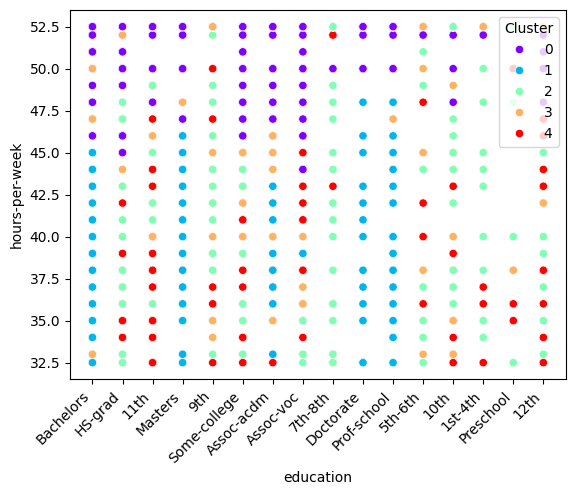

In [55]:
sns.scatterplot(x="education",y="hours-per-week",hue="Cluster",data=feature,palette="rainbow")
plt.xticks(rotation=45, ha='right')

# Agglomerative Clustering

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering #hirearchy
hc = AgglomerativeClustering(n_clusters=4,linkage="ward")

# Fit and predict clusters
feature['Cluster1'] = hc.fit_predict(feature_final)

feature.sample(3)

In [ ]:
#Evaluate Clustering

# Silhouette Score: Measure how well the clusters are separated.

from sklearn.metrics import silhouette_score
labels = hc.labels_
silhouette_avg = silhouette_score(feature_final, labels)

print(silhouette_avg)

In [ ]:
import seaborn as sns
sns.scatterplot(x="age",y="hours-per-week",hue="Cluster1",data=feature,palette="rainbow")

In [ ]:
cluster_summary = feature.groupby("Cluster").agg({
    "age": ["mean"],
    "fnlwgt": ["mean"],
    "education-num": ["mean"],
    "hours-per-week": ["mean"],
    "education": ["count"],
    "occupation": ["count"],
    "workclass": "count"
})

cluster_summary

# DBSCAN

In [ ]:
# DBSCAN
from sklearn.cluster import DBSCAN



db = DBSCAN(eps=.4 ,min_samples=4)
labels = db.fit_predict(feature_final)
# Add labels to DataFrame
feature['cluster2'] = labels

In [ ]:
#Evaluate Clustering

# Silhouette Score: Measure how well the clusters are separated.

from sklearn.metrics import silhouette_score
labels = db.labels_
silhouette_avg = silhouette_score(feature_final, labels)

print(silhouette_avg)

In [ ]:
import seaborn as sns
sns.scatterplot(x="age",y="hours-per-week",hue="Cluster2",data=feature,palette="rainbow")

In [ ]:
cluster_summary = feature.groupby("cluster").agg({
     "age": ["mean"],
    "fnlwgt": ["mean"],
    "education-num": ["mean"],
    "hours-per-week": ["mean"],
    "education": ["count"],
    "occupation": ["count"],
    "workclass": "count"
})

cluster_summary


# PCA

In [ ]:
from sklearn.decomposition import PCA
pca =PCA(n_components=4)
pcafeature = pca.fit_transform(feature_final)

In [ ]:
import pandas as pd
pcafeature = pd.DataFrame(pcafeature,columns=["pc1","pc2"])
pcafeature.head(3)

In [ ]:
pcafeature['income']= data['income']

In [ ]:
sea.scatterplot(x='pc1',y='pc2',data=pcafeature,hue='income')

In [ ]:
#finding the optimal component for pca
pca = PCA()
pca.fit(feature)

In [ ]:
pca.explained_variance_ratio_

In [ ]:
import numpy as np
cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum

In [ ]:
import matplotlib.pyplot as plt
x=[1,2,3,4]
y=cumsum
plt.plot(x,y)